# Lab 1 – Load and Explore the Data

In [4]:
# Task 1: Import the pandas library for data manipulation.
import pandas as pd

In [5]:
# Task 2: Load the 'train.csv' file into a DataFrame called df and preview the first rows.
df = pd.read_csv("train.csv")
df.head()

/tmp/ipykernel_30417/4292402596.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Task 3: Inspect the structure of the DataFrame using df.info().
df.info()

In [ ]:
# Task 4: Print the unique values in 'StateHoliday' and their counts.
df['StateHoliday'].value_counts()

In [ ]:
# Task 5: Binarize the 'StateHoliday' column so that any of 'a', 'b', or 'c' becomes 1 and 0 stays 0.
# Then, print the updated value counts.
df['StateHoliday'] = df['StateHoliday'].isin(['a', 'b','c']).astype(int)
df['StateHoliday'].value_counts()

# Lab 2 – Subsetting Stores and Basic Aggregations

In [ ]:
# Task 1: Count how many unique stores exist in the dataset.
print(f"There are {len(df.Store.unique())} stores")

In [26]:
# Task 2: Subset the data to 10 random stores (seed = 1502) and store the result in df_10.
for i in range(100):
    df_10 = df[df.Store.isin(df.Store.sample(10))].copy()
    if df_10.Store.nunique() < 10:
        print(df_10.Store.nunique())
        break

8


In [ ]:
# Task 3: Compute the mean sales for each of the 10 stores and sort them in descending order.
df_10.groupby('Store')['Sales'].mean().sort_values(ascending = False)

In [ ]:
# Task 4: For each store, find the index (row) of the day with the all-time highest sales.
df_10.groupby('Store')['Sales'].idxmax().sort_values(ascending = False)

# Lab 3 – Working with Datetime Index and Weekday Patterns

In [ ]:
# Task 1: Set the 'Date' column as the index of df_10 and preview the first rows.
df.set_index('Date', inplace=True)
df.head()

In [13]:
# Task 2: Convert the index of df_10 to a proper datetime type.
df_10.index = pd.to_datetime(df_10.index)
df_10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9420 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          9420 non-null   int64 
 1   DayOfWeek      9420 non-null   int64 
 2   Sales          9420 non-null   int64 
 3   Customers      9420 non-null   int64 
 4   Open           9420 non-null   int64 
 5   Promo          9420 non-null   int64 
 6   StateHoliday   9420 non-null   object
 7   SchoolHoliday  9420 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 662.3+ KB


In [15]:
# Task 3: Compute the average sales per weekday and per store.
df_10.groupby([df_10.index.day_of_week, 'Store'])['Sales'].mean()

Date  Store
0     24       10860.119403
      47        7877.686567
      156       8707.940299
      264       8320.291045
      267       8969.253731
                   ...     
6     353       7255.343284
      763          0.000000
      794          0.000000
      862          0.000000
      864          0.000000
Name: Sales, Length: 70, dtype: float64

<Axes: xlabel='Date'>

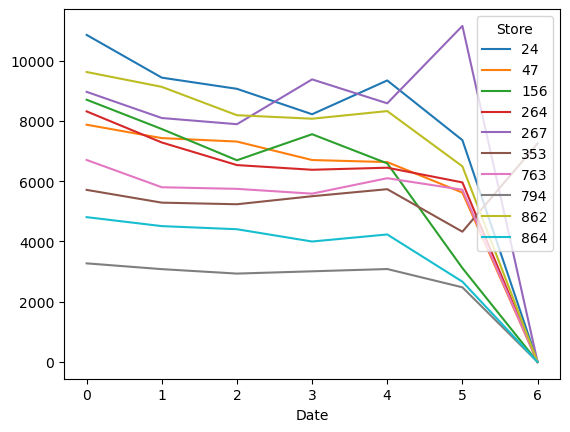

In [17]:
# Task 4: Visualize the average sales per weekday and per store as a line plot.
df_10.groupby([df_10.index.day_of_week, 'Store'])['Sales'].mean().unstack().plot()

# Lab 4 – Standardizing Sales and Comparing Weekday Patterns

In [ ]:
# Task 1: Define a function that standardizes a numeric Series using z-scores.


In [ ]:
# Task 2: Standardize the 'Sales' column within each store and store the result in a new column 'Sales_std'.


In [ ]:
# Task 3: Compute the mean of standardized sales per weekday and per store.


In [ ]:
# Task 4: Visualize the standardized mean sales per weekday and store as a line plot.


# Lab 5 – Analyzing Sales on a Specific Weekday

In [ ]:
# Task 1: Filter the data to DayOfWeek = 7 and visualize sales over time for each store.


# Lab 6 – Removing Outliers and Re-Assessing Intra-Week Seasonality

In [ ]:
# Task 1: Remove observations for DayOfWeek = 7 and for Store 353, and create a cleaned DataFrame df_clean.


In [ ]:
# Task 2: Re-standardize the 'Sales' column within each store in df_clean.


In [ ]:
# Task 3: Compute the mean of standardized sales per weekday and per store in df_clean.


In [ ]:
# Task 4: Visualize the intra-week seasonality using the standardized sales.


# Lab 7 – Analyzing the Impact of Promotions

In [ ]:
# Task 1: Compare average sales on promotion days versus non-promotion days.


In [ ]:
# Task 2: Compute the mean sales per store split by promotion status and store the result in promo_uplift.


In [ ]:
# Task 3: For each store, compute the relative uplift of sales during promotion days compared to non-promotion days.


In [ ]:
# Task 4: Identify the top 5 stores with the highest relative promotion uplift.


In [ ]:
# Task 5: Identify the 5 stores with the lowest (or most negative) relative promotion uplift.
